<a href="https://colab.research.google.com/github/gokultej/IIIT_AI-ML_LAB/blob/main/AIML_Module_Assign_4_Lab_2_Introduction_to_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

In [13]:
def eval_polynomial(coeffs, x):
    degree = len(coeffs) - 1
    result = sum([coeffs[i] * (x ** (degree - i)) for i in range(degree + 1)])
    return result

In [14]:
def eval_polynomial_jitter(coeffs, x, j):
    y = eval_polynomial(coeffs, x)
    jitter = random.uniform(-j, j)
    return y + jitter

In [15]:
def loss_mse(ys, y_bar):
    squared_diff = [(y - y_hat) ** 2 for y, y_hat in zip(ys, y_bar)]
    return sum(squared_diff) / len(ys)

In [16]:
def calc_gradient_polynomial(coeffs, inputs_x, outputs_y, epsilon=1e-8):
    degree = len(coeffs) - 1
    gradients = []

    y_bars = [eval_polynomial(coeffs, x) for x in inputs_x]
    for x, y, y_bar in zip(inputs_x, outputs_y, y_bars):
            for i in range(degree + 1):
                partial = -2 * (x ** (degree - i)) * (y - y_bar + epsilon)
                gradients.append(partial)

    n = len(inputs_x)
    updated_coeffs = [coeffs[i] - lr * sum(gradients[i::degree + 1]) / n for i in range(degree + 1)]

    return updated_coeffs

In [17]:
def gradient_descent(epochs, lr, gradient_clip=1e6):
    losses = []
    coeffs_to_test = np.random.uniform(-1, 1, 6)
    for epoch in range(epochs):
        y_bar = [eval_polynomial(coeffs_to_test, x) for x in hundred_xs]
        loss = loss_mse(ys, y_bar)
        gradients = calc_gradient_polynomial(coeffs_to_test, hundred_xs, ys)
        gradients = [np.clip(grad, -gradient_clip, gradient_clip) for grad in gradients]
        coeffs_to_test = [coeffs_to_test[i] - lr * gradients[i] for i in range(len(coeffs_to_test))]
        losses.append(loss)


        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {loss}, Coefficients: {coeffs_to_test}")


        if any(np.isnan(coeffs_to_test)):
            print(f"NaN coefficients encountered at epoch {epoch}")
            break

    return losses, coeffs_to_test, y_bar


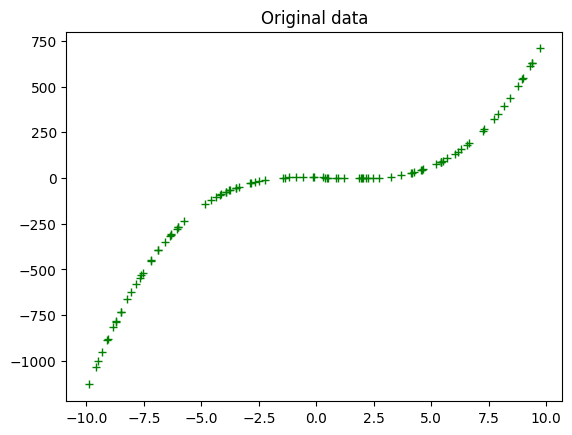

In [18]:
hundred_xs = np.random.uniform(-10, 10, 100)
coeffs_cubic = [1, -2, -3, 4]
ys = [eval_polynomial(coeffs_cubic, x) for x in hundred_xs]

plt.plot(hundred_xs, ys, 'g+')
plt.title('Original data')
plt.show()

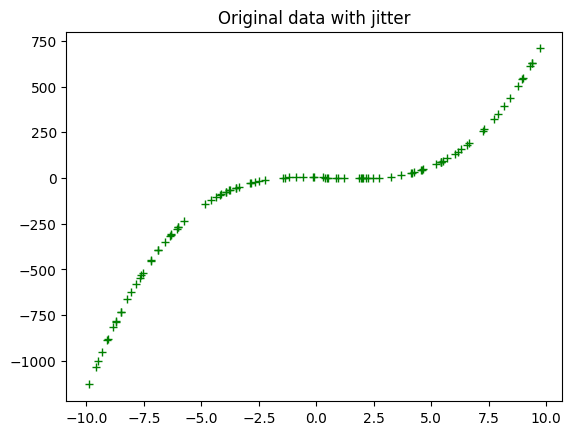

In [19]:
ys_jittered = [eval_polynomial_jitter(coeffs_cubic, x, 0.1) for x in hundred_xs]

plt.plot(hundred_xs, ys_jittered, 'g+')
plt.title('Original data with jitter')
plt.show()


Epoch 0, Loss: 853680556.042771, Coefficients: [-18.725930573003506, 0.6397678635144546, -0.5932779282099581, 0.02195048641270218, 0.8121476455551775, -0.5012991239373465]
Epoch 1000, Loss: 9.934454554627267e+18, Coefficients: [-100018.72593057301, 99824.17469189512, -99756.09169957237, 92887.45092958763, -83763.51912107557, 4818.725994273532]
Epoch 2000, Loss: 3.977559847372876e+19, Coefficients: [-200018.725930573, 199824.17469189514, -199756.09169957237, 192887.45092958765, -183763.51912107557, 18690.67316778355]
Epoch 3000, Loss: 8.952346616751671e+19, Coefficients: [-300018.725930573, 299824.17469189514, -299756.0916995724, 292887.45092958765, -283763.5191210756, 40754.23087826165]
Epoch 4000, Loss: 1.5917807908602118e+20, Coefficients: [-400018.725930573, 399824.17469189514, -399756.0916995724, 392887.45092958765, -383763.5191210756, 70229.97551088927]
Epoch 5000, Loss: 2.4873945593366112e+20, Coefficients: [-500018.725930573, 499824.17469189514, -499756.0916995724, 492887.450929

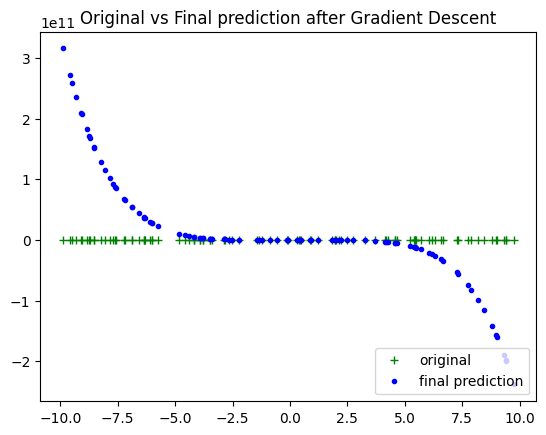

In [20]:
lr = 0.0001
epochs = 30000
losses, final_coeffs, final_y_bar = gradient_descent(epochs, lr)

plt.plot(hundred_xs, ys, 'g+', label='original')
plt.plot(hundred_xs, final_y_bar, 'b.', label='final prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc="lower right")
plt.show()


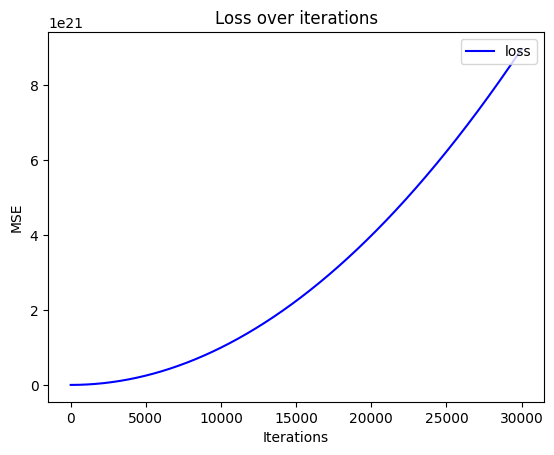

Original Coefficients: [1, -2, -3, 4]
Final Coefficients predicted: [-2999918.725930573, 2999724.174691895, -2999656.0916995723, 2992787.4509295877, -2983663.5191210755, 2048681.6352803307]


In [22]:
plt.plot(losses, 'b-', label='loss')
plt.title('Loss over iterations')
plt.legend(loc="upper right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

print(f"Original Coefficients: {coeffs_cubic}")
print(f"Final Coefficients predicted: {final_coeffs}")
